In [1]:
""" Install Libraries """
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install sklearn
# !pip3 install matplotlib

""" Load Libraries"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
def load_data():
    data_iris = load_iris()
    data = pd.DataFrame(data=np.c_[data_iris['data'], data_iris['target']], 
                    columns=data_iris['feature_names'] + ['class'])
    data['class'] = data['class'].astype('category')
    return data

# 3.0 - Load Dataset 

In [4]:
data = load_data()
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 3.1 - The relationship between 2 Features

* 2차원 데이터는 1차원 데이터에서 적용했던 평균 및 분산과 같은 방법을 사용하여 설명할 수 없음
* 따라서, 2차원 데이터를 설명하기 위해 `공분산`과 `상관계수`에 대해 알아보고 적용해보겠음

## 3.1.1 - 공분산(Covariance)
* **공분산**은 기존 1차원 데이터를 설명할 때 사용했던 분산과 개념이 비슷하며, 두 개의 분산을 동시에 본다는 개념으로 이해하면 좋음
* `sepal width`와 `petal length` 변수로 구성된 `cov_df` 데이터프레임을 구성하여 실습을 진행하고자 함


In [12]:
cov_df = data.iloc[:,1:3]
cov_df

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


* `numpy`에서 제공하는 `.cov()` 함수를 활용하여 **분산공분산 행렬(variance-covariance matrix)**을 얻을 수 있음
* 행렬의 1행 1열이 첫 번째 인수인 `sepal width`, 2행 2열이 두 번째 인수인 `petal length`에 대응하며, 이를 교차한 나머지 성분이 **공분산**에 해당

In [23]:
cov = np.cov(cov_df['sepal width (cm)'], cov_df['petal length (cm)'])
print('공분산 : {}'.format(cov[0, 1]))
cov

공분산 : -0.3296563758389261


array([[ 0.18997942, -0.32965638],
       [-0.32965638,  3.11627785]])

* 1행 1열과 2행 2열은 단일 변수로 구성되며, 이는 자연스럽게 각 변수의 분산을 나타냄
* 위의 분산공분산 행렬에서 구한 분산과 일치하는 것을 확인할 수 있음

In [25]:
var_sepal, var_petal = np.var(cov_df['sepal width (cm)']), np.var(cov_df['petal length (cm)'])
var_sepal, var_petal

(0.1887128888888889, 3.0955026666666665)

## 3.1.2 - 상관계수(Correlation Coefficient)
* **상관계수**는 두 변수 사이의 상관을 나타낼 때 사용하는 지표
* **상관계수**는 양의 상관관계를 가질수록 1로, 음의 상관관계를 가질수록 -1로 수렴
$$
r_{xy} = \frac{S_{xy}}{S_{x}S_{y}} \\
= \frac{1}{n}\sum^{n}_{i=1}({\frac{x_i - \bar{x}}{S_x}})(\frac{y_i - \bar{y}}{S_y})
$$

* `Pandas`의 `.corr()` 함수를 활용하여 상관계수를 손쉽게 구할 수 있음
* 분산공분산 행렬과 마찬가지로 1행 2열, 2행 1열이 두 변수의 상관계수임을 확인할 수 있음

In [28]:
coco = cov_df.corr()
coco

,sepal width (cm),petal length (cm)
sepal width (cm),1.00000,-0.42844
petal length (cm),-0.42844,1.00000


# 3.2 - 데이터 시각화(Visualization)
* 1차원 데이터 시각화와 마찬가지로 `matplotlib` 라이브러리를 활용하여 시각화

## 3.2.1 - 산점도(Scatter)
* 2차원 데이터 시각화에는 **산점도**가 효과적
* 두 변수의 위치를 그래프에서 점으로 표현한 것

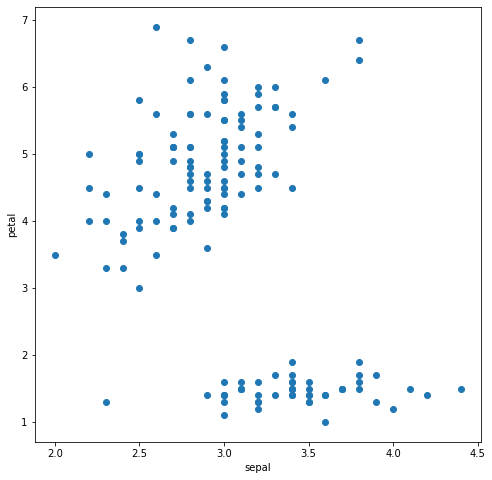

In [31]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# 산점도
ax.scatter(cov_df['sepal width (cm)'], cov_df['petal length (cm)'])
ax.set_xlabel('sepal')
ax.set_ylabel('petal')

plt.show()

* `petal`의 크기가 1인 경우, `sepal`은 대체로 3이상의 크기를 가지는 것을 확인할 수 있음
* `petal`의 크기가 3이상인 경우, 대체로 `petal`의 크기가 커질수록 `sepal`의 크기 또한 커지는 것을 확인할 수 있음

## 3.2.2 - 회귀직선(Regression Line)
* **회귀직선**은 두 데이터 사이의 관계를 잘 표현하는 직선을 의미
* `Matplotlib`에는 회귀직선을 그리는 함수가 없기에, `numpy`에서 직접 구현
* 회귀직선을 $y$라고 했을 때, 회귀직선 방정식은 아래의 수식과 같음
$$y = \beta_0 + \beta_1{x}$$

In [38]:
poly_fit = np.polyfit(cov_df['sepal width (cm)'], cov_df['petal length (cm)'], 1) # 계수 b0와 b1 산출
poly_1d = np.poly1d(poly_fit) # b0 + b1x를 반환하는 함수 작성
cx = np.linspace(cov_df['sepal width (cm)'].min(), cov_df['petal length (cm)'].max()) # x좌표 생성
cy = poly_1d(cx) # y좌표 생성

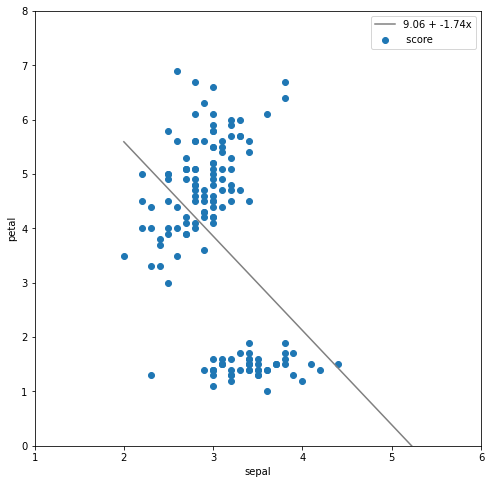

In [47]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(cov_df['sepal width (cm)'], cov_df['petal length (cm)'], label = ' score')
ax.plot(cx, cy, color='gray', label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
ax.set_xlabel('sepal')
ax.set_ylabel('petal')
ax.set_ylim(0, 8)
ax.set_xlim(1, 6)
ax.legend(loc='upper right')

plt.show()

## 3.2.3 - 히트맵(Heat Map)
* **히트맵**은 히스토그램을 2차원으로 표현한 것으로, `hist2d` 함수를 활용

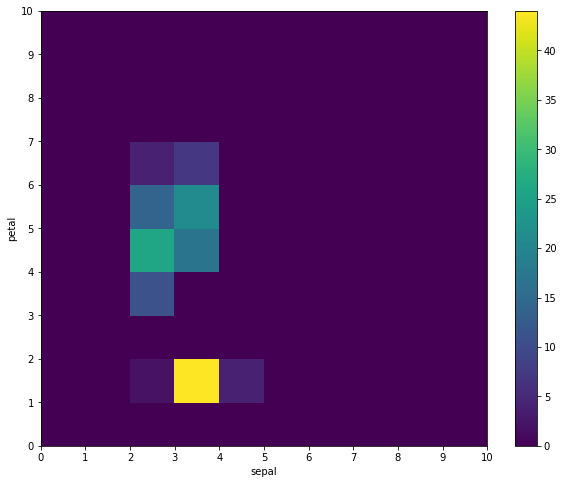

In [58]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(cov_df['sepal width (cm)'], cov_df['petal length (cm)'],
             bins=[10, 10], range=[(0, 10), (0, 10)])

ax.set_xlabel('sepal')
ax.set_ylabel('petal')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()